In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Draw a simple market, each node is a school, a government department or a private company.

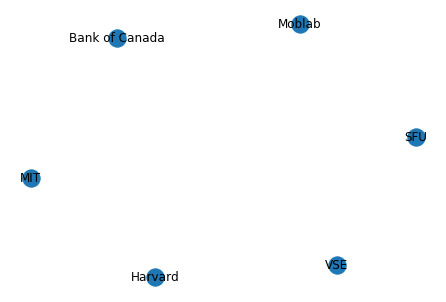

In [29]:
Dg=nx.DiGraph()
nodes = ['Harvard','MIT','VSE','SFU','Bank of Canada','Moblab']
Dg.add_nodes_from(nodes)
nx.draw(Dg,with_labels=True)

In [30]:
edges=[('MIT','Harvard'),('VSE','MIT'),('SFU','MIT'),('Bank of Canada','VSE'),('Moblab','SFU')]
Dg.add_edges_from(edges)


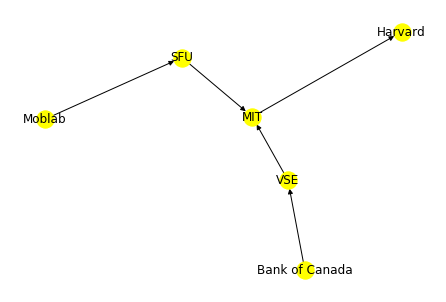

In [31]:
nx.draw(Dg,with_labels=True,node_color='yellow')

In [32]:
sorted(nx.algorithms.pagerank(Dg).items(), key=lambda student: student[1])

[('Bank of Canada', 0.06959814460084233),
 ('Moblab', 0.06959814460084233),
 ('VSE', 0.12875653991066732),
 ('SFU', 0.12875653991066732),
 ('MIT', 0.28848284826137593),
 ('Harvard', 0.3148077827156044)]

In [46]:
Ia = nx.adjacency_matrix(Dg,["MIT",'Harvard','VSE','SFU','Bank of Canada','Moblab'] ).toarray()
print(Ia)

[[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]]


In [55]:
import numpy as np
Netm = np.matrix(np.transpose(Ia))
print(Netm)

[[0 0 1 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [61]:
e = np.array([1,1,1,1,1,1])
E = np.identity(6)
print(E)
d= .07
A =E-(1-d)*Netm
print(A)
r=np.linalg.solve(A,d*e)
print(r)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.    0.   -0.93 -0.93  0.    0.  ]
 [-0.93  1.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.   -0.93  0.  ]
 [ 0.    0.    0.    1.    0.   -0.93]
 [ 0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]]
[0.321286   0.36879598 0.1351     0.1351     0.07       0.07      ]


Axioms for pagerank from [Tennenloz and Altman](https://www.cse.huji.ac.il/~noam/econcs/p1-altman.pdf).

A graph $G=(V,E)$ is a set of vertices and edges.  Vertices are referred to as $v$ and an edge is a par $(v_1,v_2)$. On every set of vertices, there is a set of graphs $\mathcal{G}$ defined on those vertices. A ranking of the vertices is a linear ordering $\succeq$ of the vertices. A ranking system is a map from the set of graphs defined on a set of vertices into the set of possible linear orders over those vertices.

Property 1: (Self Edge) Let $G = (V,E)$ be a graph and $v$ a node in $V$ such that $(v,v)\not\in E$. Let $G^\prime = (V,E\cup(v,v)$.  If $v\succeq_G v_1$ then can't be that $v_1\succeq_{G^\prime}v$, otherwise $v_1\succeq_{G}v_2$ if an only if $v_1\succeq_{G^\prime}v_2$.

Let $S(v,G)$ be the set ${v^\prime \in V|(v,v^\prime)\in E}$ (successors of $v$).

Property 2: (Committee) Let $u$ be a collection of nodes that aren't in $V$. Let $e_u={(v,u^\prime)|u^\prime\in u}$ be the set of edges created by linking $v$ to each element of $u$.  Let $e_S={(u^\prime,v^\prime)|u^\prime\in u;v^\prime \in S(v,G)}$ be the set of edges connecting $v$ to its successors.  Then $G^\prime = (V\cup u,E - e_u\cup e_S)$.  Then for each pair $ v, v^\prime)\in V$, $v\succeq_{G v^\prime}$ if and only if $v\succeq_G v^\prime$.

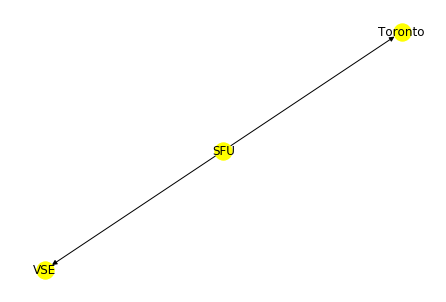

In [67]:
cn = nx.DiGraph()
cnodes = ['VSE','SFU','Toronto']
cedges =[('SFU','VSE'),('SFU','Toronto')]
cn.add_nodes_from(cnodes)
cn.add_edges_from(cedges)
nx.draw(cn,with_labels=True,node_color='yellow')


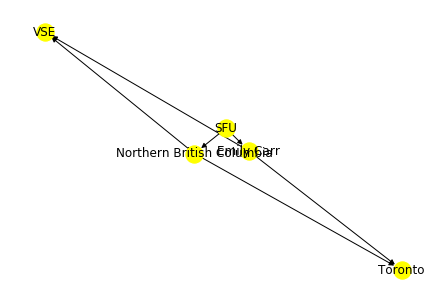

In [68]:
ca=nx.DiGraph()
canodes = cnodes+['Northern British Columbia', 'Emily Carr']
caedges = [('Northern British Columbia','VSE'),('Emily Carr','Toronto'),
           ('Northern British Columbia','Toronto'),('Emily Carr','VSE'),
          ('SFU','Emily Carr'),('SFU','Northern British Columbia')]
ca.add_nodes_from(canodes)
ca.add_edges_from(caedges)
nx.draw(ca,with_labels=True,node_color='yellow')